In [72]:
#This notebook investigates the orbital stability time of fake systems
import pandas as pd
import numpy as np
import os
import sys
import rebound
import time
import math
import matplotlib.pyplot as plt
%matplotlib inline 

#Choose which of the simulations to plot
id_ = int(98)

Np=4
ecc=["","_0.05","_0.1"]
mass=["10","20","30","40","50"]
systembase="Ari_Fake_"

system = systembase+mass[4]+ecc[1]
maxorbs = float(1000000000)
name = system+"_"+str(int(np.log10(maxorbs)))+"_"+str(id_)
#name = system+"_"+str(id_)

data = pd.read_csv('systems/%s_data.csv'%system)
d = data.iloc[id_]
P1 = d["P1"]/365.2422*2*np.pi #in yr/2*pi units

#del sim
sa = rebound.SimulationArchive("output/"+name+"_SA.bin")
print("Number of snapshots: %d" % len(sa))
print("Orbit number of first and last snapshot: %.1f, %.1f" % (sa.tmin/P1, sa.tmax/P1))

Number of snapshots: 1001
Orbit number of first and last snapshot: 0.0, 1000663561.6


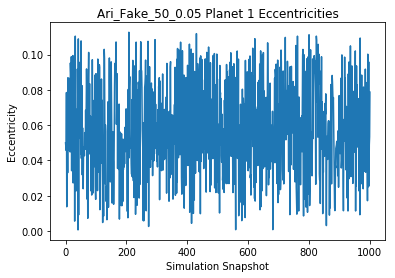

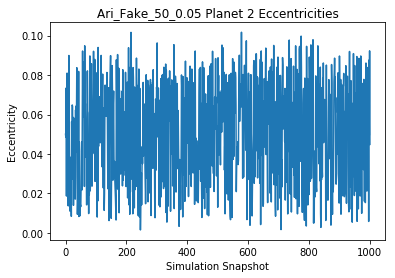

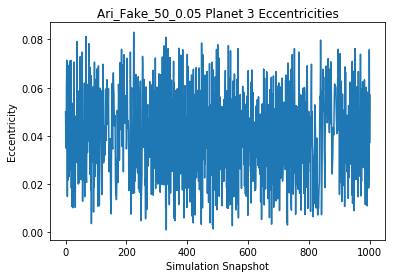

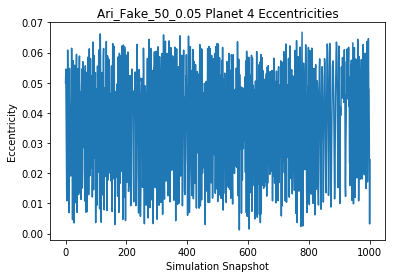

In [73]:
eccentricities = np.zeros((Np,len(sa)))
for i, sim in enumerate(sa):
    for j in range(Np):
        eccentricities[j,i] = sim.particles[j+1].e

for i in range(Np):
    plt.plot(eccentricities[i,:])
    plt.xlabel("Simulation Snapshot")
    plt.ylabel("Eccentricity")
    plt.title(system+" Planet %d Eccentricities"%(i+1))
    plt.show()

#fig = plt.gcf()
#fig.savefig("justwork.png", bbox_inches="tight")

#print(eccentricities)

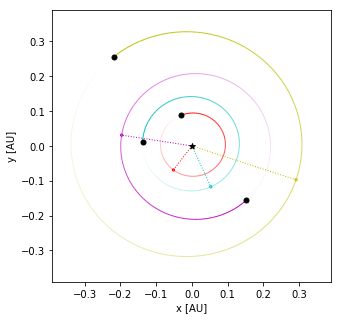

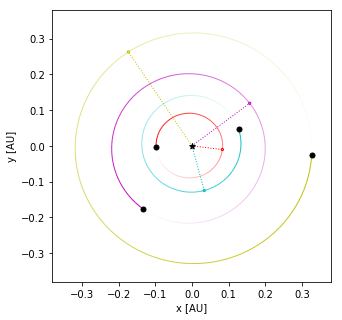

In [74]:
sim1 = sa.getSimulation(0) #at time=0
fig1 = rebound.OrbitPlot(sim1, unitlabel="[AU]", color=True, periastron=True)

sim2 = sa.getSimulation(sa.tmax, mode="close")
fig2 = rebound.OrbitPlot(sim2, unitlabel="[AU]", color=True, periastron=True)

#sim = sa.getSimulation(12345.6, mode="close")
#sim = sa.getSimulation(12345.6, mode="exact")

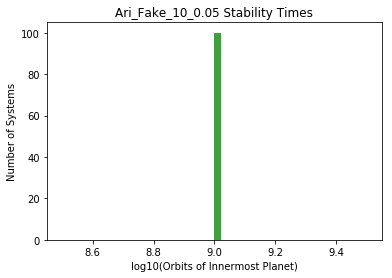

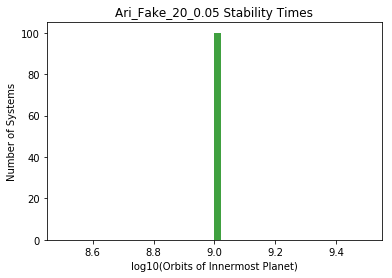

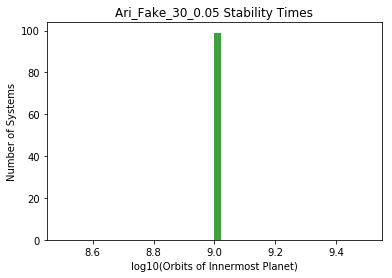

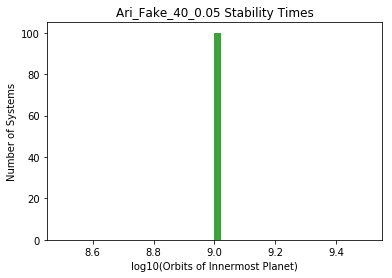

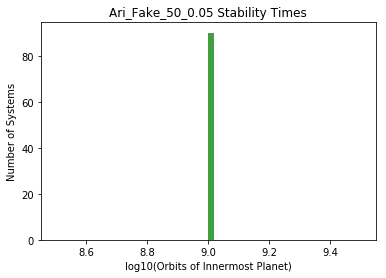

In [76]:
#histograms of all of the stability time distributions

#change if desired
use="orbits"

for i in range(len(mass)):
    system2=systembase+mass[i]+ecc[1] #CHANGE THE ECCENTRICITY
    data=pd.read_csv("systems/"+system2+"_Nbodyresults.csv",header=None)
    
    if use=="times":
        times=np.log10(data[4])
        n, bins, patches = plt.hist(times, 50, facecolor='g', alpha=0.75)
        plt.xlabel("log10(Time (yr/2*pi))")
    else:
        orbits=np.log10(np.divide(data[4],data[3]))
        n, bins, patches = plt.hist(orbits, 50, facecolor='g', alpha=0.75)
        plt.xlabel("log10(Orbits of Innermost Planet)")
    plt.ylabel("Number of Systems")
    plt.title(system2+" Stability Times")
    plt.show()